In [1]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from codes import nnlab as nl
import pandas as pd

In [2]:
graph_dict = {}
hotspots = {}
thr = '4A'
for code in open('hotspot_list'+thr,'r'):
    f = open('graphs'+thr+'/'+code.rstrip(), 'rb')
    gs = pickle.load(f)
    graph_dict[code.rstrip()] = gs['1_2']
    hotspots[code.rstrip()] = gs['H']
#for g in graph_dict: print (g)

/Users/gabriele/miniconda3/envs/abi/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


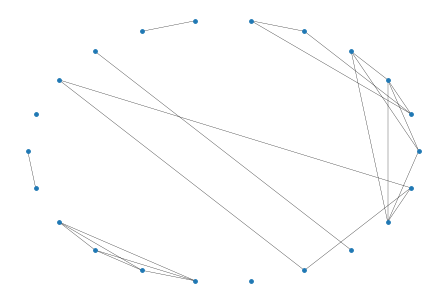

In [3]:
options = {'node_size': 14, 'width': 0.3, 'font_size': 6}
nx.draw_shell(graph_dict['1ais_A_B'], with_labels=False, **options)
plt.show()

In [6]:
count = 0
countpos = 0
countneg = 0
for key in hotspots: 
    for el in hotspots[key]: 
        count += 1
        if hotspots[key][el][0] > 2: countpos += 1
        if hotspots[key][el][0] < 0.4: countneg += 1
print ('Total: '+str(count)+'\nHotspot: '+str(countpos)+'\nNon-Hotspot: '+str(countneg))


Total: 689
Hotspot: 206
Non-Hotspot: 376


In [11]:
rscores = {'ALA':0,'ARG':3,'ASN':-2,'ASP':3,
           'CYS':0,'GLN':-2,'GLU':3,'GLY':0,
           'HIS':3,'ILE':2,'LEU':2,'LYS':3,
           'MET':3,'PHE':3,'PRO':0,'SER':-2,
           'THR':-2,'TRP':3,'TYR':3,'VAL':2}

leaderlist = {}
for code in graph_dict:

    leaderlist[code] = []
    G = graph_dict[code]
    cliques = list(nx.find_cliques(G))

    noc = []
    for c in cliques: 
        if len(c) <= 2: noc.append(c) 
    for c in noc: cliques.remove(c)
    subset = []
    residuedict = {}
    for c in cliques:
        for contact in c: 
            residuedict[contact.split('_')[0]] = residuedict.get(contact.split('_')[0], 0)
            residuedict[contact.split('_')[0]] += 1
            residuedict[contact.split('_')[1]] = residuedict.get(contact.split('_')[1], 0)
            residuedict[contact.split('_')[1]] += 1
            subset.append(contact)
             
    for res in residuedict: residuedict[res] += rscores[res[0:3]]

    for residue in residuedict: 
        if residuedict[residue] > 4: leaderlist[code].append([residue, residuedict[res]])
    
cm = {'PP':{'TP':0,'FP':0},'PN':{'TN':0,'FN':0}} 
d = {'x':[], 'y':[]}
for code in leaderlist: 
    print ('\n'+code)
    print (hotspots[code])
    for residue in leaderlist[code]:
        if residue[0] in hotspots[code]: 
            print (residue[0]+'\t'+str(hotspots[code][residue[0]][0]))
            if hotspots[code][residue[0]][0] >= 2.0: cm['PP']['TP'] += 1
            elif hotspots[code][residue[0]][0] <= 0.4: cm['PP']['FP'] += 1
        else: print (residue[0]+'\t-no affinity-')
    
    for residue in hotspots[code]:
        neg = 'y'
        for element in leaderlist[code]:
            if residue in element: neg = 'n'
        if neg == 'y' and hotspots[code][residue][0] <= 0.4: cm['PN']['TN'] += 1
        elif neg == 'y' and hotspots[code][residue][0] >= 2.0: cm['PN']['FN'] += 1
            
print (cm, '\n')
stats = nl.metrics(cm)
print ('TPR:'+str(stats[2]))
print ('TNR:'+str(stats[4]))
print ('ACC:'+str(stats[5]))
print ('PPV:'+str(stats[6]))
print ('MCC:'+str(stats[7]))



1a22_A_B
{'ASN12': [0.1, 'A'], 'MET14': [0.0, 'A'], 'LEU15': [0.15, 'A'], 'ARG16': [0.238, 'A'], 'ARG19': [0.051, 'A'], 'HIS21': [0.155, 'A'], 'GLN22': [0.22, 'A'], 'PHE25': [0.229, 'A'], 'ASP26': [0.211, 'A'], 'TYR42': [0.221, 'A'], 'GLN46': [0.191, 'A'], 'SER51': [0.348, 'A'], 'SER55': [0.11, 'A'], 'SER57': [0.161, 'B'], 'PRO59': [0.38, 'A'], 'SER62': [0.155, 'A'], 'ASN63': [0.314, 'A'], 'GLN69': [0.05, 'A'], 'ARG167': [2.424, 'A']}
ASP364	-no affinity-
LYS367	-no affinity-
TRP369	-no affinity-
CYS322	-no affinity-
LEU45	-no affinity-
PRO48	-no affinity-
ARG271	-no affinity-
TRP276	-no affinity-
ASP171	-no affinity-
ARG243	-no affinity-
TRP304	-no affinity-
ARG64	-no affinity-

1a4y_A_B
{'ARG33': [0.327, 'B'], 'TRP261': [0.101, 'A'], 'TRP263': [1.2, 'A'], 'GLU287': [0.101, 'A'], 'SER289': [0.042, 'A'], 'TRP318': [1.5, 'A'], 'LYS320': [0.31, 'A'], 'GLU344': [0.179, 'A'], 'TRP375': [1.0, 'A'], 'GLU401': [0.9, 'A'], 'GLN430': [0.072, 'A'], 'VAL432': [0.072, 'A'], 'TYR434': [7.207, 'A']

ARG353	-no affinity-
GLN384	-no affinity-

4l0z_A_B
{'PHE194': [1.271671513, 'A'], 'LEU198': [1.369296406, 'A'], 'LEU201': [1.341661986, 'A']}
PHE194	1.271671513
GLU202	-no affinity-

4l72_A_B
{'ASN229': [-6.883113358, 'A']}
TYR540	-no affinity-
LEU294	-no affinity-
ARG336	-no affinity-
GLU513	-no affinity-
ARG542	-no affinity-
ARG511	-no affinity-
TYR322	-no affinity-
ILE295	-no affinity-
ASP510	-no affinity-

4lrx_A_B
{'HIS56': [0.3204415, 'A']}
TYR294	-no affinity-
GLY18	-no affinity-
TYR297	-no affinity-
ASN298	-no affinity-
GLN15	-no affinity-
ALA22	-no affinity-
HIS23	-no affinity-
LYS21	-no affinity-
GLU292	-no affinity-
LEU4	-no affinity-
LYS3	-no affinity-
ASN6	-no affinity-
ASP232	-no affinity-
LEU231	-no affinity-
GLU14	-no affinity-
PHE328	-no affinity-

4mdx_A_B
{'GLU78': [3.809408462, 'A']}
VAL17	-no affinity-
ARG87	-no affinity-
ASP84	-no affinity-
GLU20	-no affinity-
SER19	-no affinity-
THR82	-no affinity-
ILE80	-no affinity-
ILE43	-no affinity-
ARG81	-no affinity-
ASN3

In [12]:
rscores = {'ALA':0,'ARG':3,'ASN':-2,'ASP':3,
           'CYS':0,'GLN':-2,'GLU':3,'GLY':0,
           'HIS':3,'ILE':2,'LEU':2,'LYS':3,
           'MET':3,'PHE':3,'PRO':0,'SER':-2,
           'THR':-2,'TRP':3,'TYR':3,'VAL':2}

leaderlist = {}
for code in graph_dict:
    residuedict = {}
    leaderlist[code] = []
    G = graph_dict[code]
    
    for contact in G: 
        residuedict[contact.split('_')[0]] = residuedict.get(contact.split('_')[0], 0)
        residuedict[contact.split('_')[0]] += 1
        residuedict[contact.split('_')[1]] = residuedict.get(contact.split('_')[1], 0)
        residuedict[contact.split('_')[1]] += 1
             
    for res in residuedict: residuedict[res] += rscores[res[0:3]]
    
    for residue in residuedict: 
        if residuedict[residue] > 4: leaderlist[code].append([residue, list(residuedict.keys())])
    
    
    
cm = {'PP':{'TP':0,'FP':0},'PN':{'TN':0,'FN':0}} 
for code in leaderlist: 
    print ('\n'+code)
    print (hotspots[code])
    for residue in leaderlist[code]:
        if residue[0] in hotspots[code]: 
            print (residue[0]+'\t'+str(hotspots[code][residue[0]][0]))
            if hotspots[code][residue[0]][0] >= 2.0: cm['PP']['TP'] += 1
            elif hotspots[code][residue[0]][0] <= 0.4: cm['PP']['FP'] += 1
        else: print (residue[0]+'\t-no affinity-')
    
    for residue in hotspots[code]:
        neg = 'y'
        for element in leaderlist[code]:
            if residue in element: neg = 'n'
        if neg == 'y' and hotspots[code][residue][0] <= 0.4: cm['PN']['TN'] += 1
        elif neg == 'y' and hotspots[code][residue][0] >= 2.0: cm['PN']['FN'] += 1
            
print (cm, '\n')
stats = nl.metrics(cm)
print ('TPR:'+str(stats[2]))
print ('TNR:'+str(stats[4]))
print ('ACC:'+str(stats[5]))
print ('PPV:'+str(stats[6]))
print ('MCC:'+str(stats[7]))
            



1a22_A_B
{'ASN12': [0.1, 'A'], 'MET14': [0.0, 'A'], 'LEU15': [0.15, 'A'], 'ARG16': [0.238, 'A'], 'ARG19': [0.051, 'A'], 'HIS21': [0.155, 'A'], 'GLN22': [0.22, 'A'], 'PHE25': [0.229, 'A'], 'ASP26': [0.211, 'A'], 'TYR42': [0.221, 'A'], 'GLN46': [0.191, 'A'], 'SER51': [0.348, 'A'], 'SER55': [0.11, 'A'], 'SER57': [0.161, 'B'], 'PRO59': [0.38, 'A'], 'SER62': [0.155, 'A'], 'ASN63': [0.314, 'A'], 'GLN69': [0.05, 'A'], 'ARG167': [2.424, 'A']}
HIS18	-no affinity-
HIS21	0.155
LYS41	-no affinity-
GLU327	-no affinity-
LEU45	-no affinity-
TRP276	-no affinity-
ARG271	-no affinity-
TRP304	-no affinity-
TRP369	-no affinity-
ARG64	-no affinity-
ASP364	-no affinity-
LYS367	-no affinity-
ASP171	-no affinity-
ARG243	-no affinity-
ARG178	-no affinity-

1a4y_A_B
{'ARG33': [0.327, 'B'], 'TRP261': [0.101, 'A'], 'TRP263': [1.2, 'A'], 'GLU287': [0.101, 'A'], 'SER289': [0.042, 'A'], 'TRP318': [1.5, 'A'], 'LYS320': [0.31, 'A'], 'GLU344': [0.179, 'A'], 'TRP375': [1.0, 'A'], 'GLU401': [0.9, 'A'], 'GLN430': [0.072,

TRP141	-no affinity-
ILE150	-no affinity-

3osg_A_D
{'LYS49': [3.120438353, 'A'], 'LYS51': [2.333915515, 'A'], 'PHE52': [3.332347694, 'A']}

3q3j_B_A
{'TYR114': [0.3, 'B']}
TRP1555	-no affinity-
PHE47	-no affinity-
ARG1562	-no affinity-
GLU48	-no affinity-
TYR1587	-no affinity-
LEU80	-no affinity-

3qsu_A_B
{'LYS33': [1.778802469, 'A']}
ASP40	-no affinity-
ILE7	-no affinity-
TYR56	-no affinity-
LEU54	-no affinity-
LYS57	-no affinity-
HIS58	-no affinity-
PHE26	-no affinity-
HIS53	-no affinity-
TYR63	-no affinity-

3se8_H_G
{'ARG30': [-0.04, 'H']}
ARG30	-0.04
GLY124	-no affinity-
ALA281	-no affinity-
TRP47	-no affinity-
TRP50	-no affinity-
LEU53	-no affinity-
ASP368	-no affinity-
MET426	-no affinity-
TRP427	-no affinity-
TRP54	-no affinity-
ASP457	-no affinity-
ARG61	-no affinity-
ASP76	-no affinity-
LYS97	-no affinity-
ASP100	-no affinity-
PHE100	-no affinity-

3se8_L_G
{'GLU1': [-0.57, 'L'], 'GLN27': [-0.22, 'L']}
GLU1	-0.57
PHE91	-no affinity-
GLU96	-no affinity-
PHE97	-no affinity-

